In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

df = pd.read_csv('C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction\\data\\Coup data 2.1.2.csv')
print(df.head())
print("Shape:", df.shape)
print(df.info())
display(df.describe())

       coup_id  cowcode      country  year  month  day  event_type  \
0  70003101963      700  Afghanistan  1963      3   10        coup   
1  70007171973      700  Afghanistan  1973      7   17        coup   
2  70009201973      700  Afghanistan  1973      9   20   attempted   
3  70011261976      700  Afghanistan  1976     11   26  conspiracy   
4  70004271978      700  Afghanistan  1978      4   27        coup   

   unrealized  realized  conspiracy  attempt  military  dissident  rebel  \
0           0         1           0        0         0          0      0   
1           0         1           0        0         1          0      0   
2           1         0           0        1         1          1      0   
3           1         0           1        0         1          1      0   
4           0         1           0        0         1          1      0   

   palace  foreign  auto  resign  popular  counter  other  noharm  injured  \
0       0        0     1       0        0   

,cowcode,year,month,day,unrealized,realized,conspiracy,attempt,military,dissident,rebel,palace,foreign,auto,resign,popular,counter,other,noharm,injured,killed,harrest,jailed,tried,fled,exile
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,439.515800,1979.112130,6.574924,15.873598,0.550459,0.449541,0.194699,0.355759,0.602446,0.298675,0.063201,0.133537,0.077472,0.041794,0.086646,0.097859,0.020387,0.016310,0.949032,0.008155,0.042813,0.041794,0.055046,0.010194,0.078491,0.048930
std,244.434234,19.291419,3.536074,8.804239,0.497701,0.497701,0.396171,0.478987,0.489642,0.457910,0.243448,0.340328,0.267475,0.200220,0.281460,0.297276,0.141393,0.126729,0.220045,0.089982,0.202540,0.200220,0.228186,0.100499,0.269080,0.215831
min,2.000000,1945.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,1964.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,461.000000,1978.000000,7.000000,16.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,630.000000,1992.000000,10.000000,23.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,950.000000,2022.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


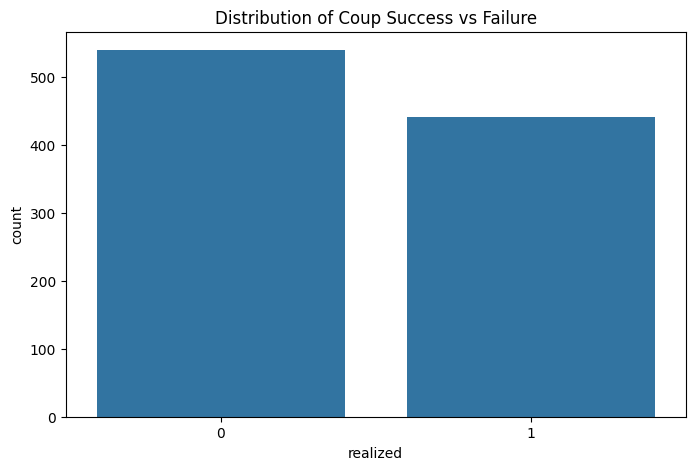

In [2]:
df["realized"].value_counts(), df["realized"].value_counts(normalize=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='realized', data=df)
plt.title('Distribution of Coup Success vs Failure')
plt.show()

Remaining features: 19


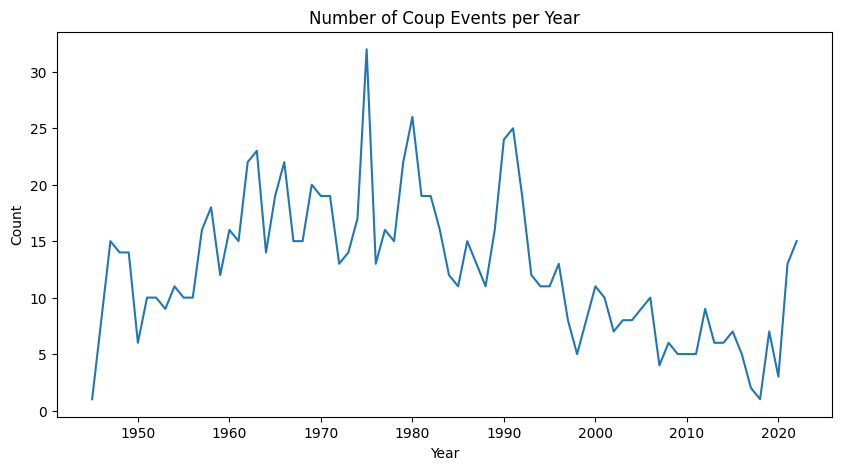

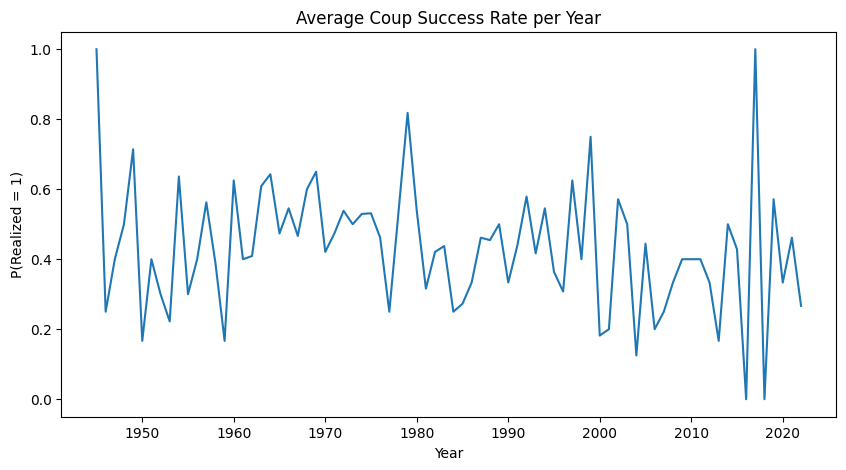

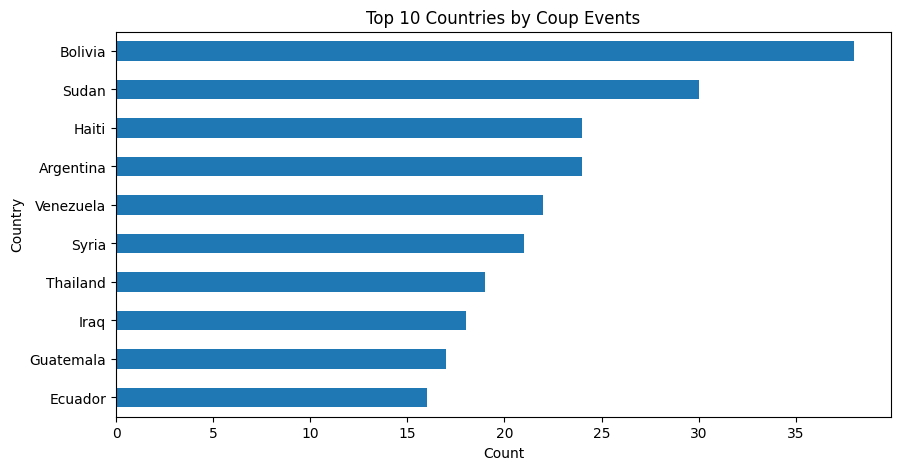


Binary features: 13


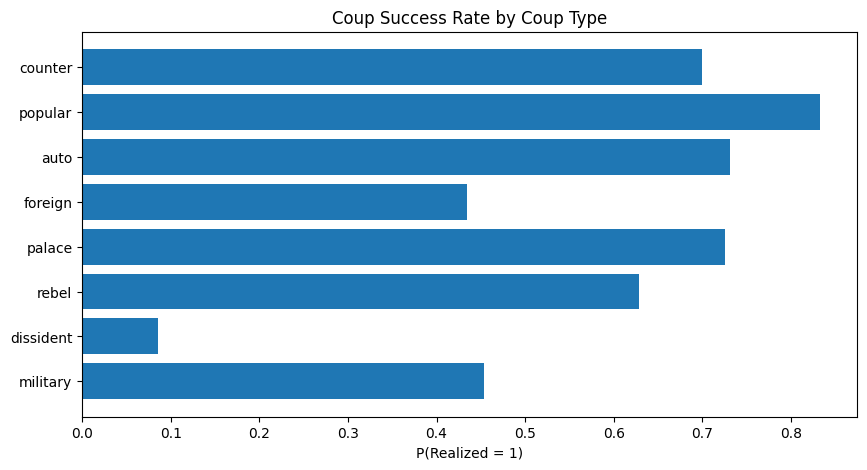

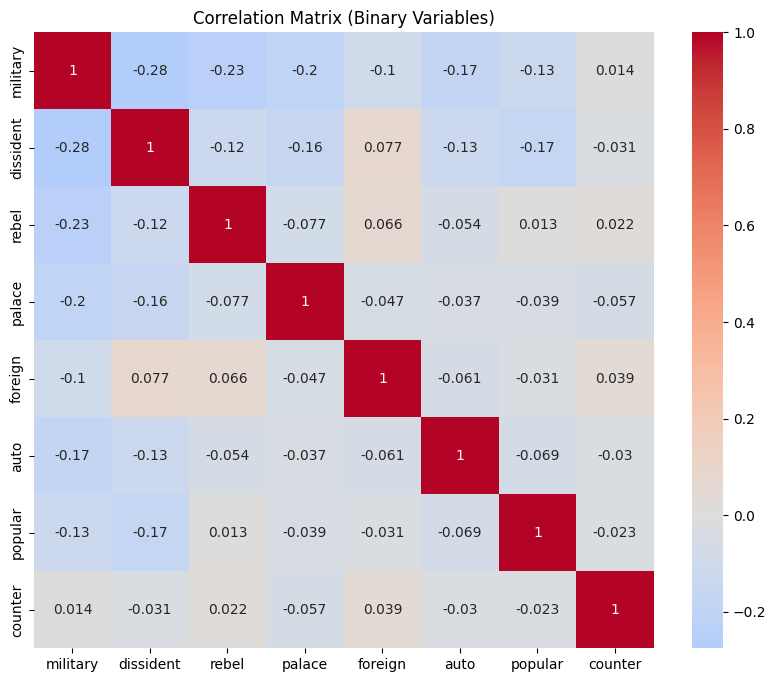

In [3]:
# Drop non-informative columns
non_features = ["coup_id", "event_type"]
df = df.drop(columns=[c for c in non_features if c in df.columns])

# Drop data leakage columns (outcome-dependent variables)
leakage_cols = [
    "noharm", "injured", "killed",
    "harrest", "jailed", "tried",
    "fled", "exile"
]

df = df.drop(columns=[c for c in leakage_cols if c in df.columns])

print("Remaining features:", df.shape[1])

# ===== TEMPORAL AND GEOGRAPHIC ANALYSIS (before dropping year/country) =====

# Plot event frequency over time
plt.figure(figsize=(10, 5))
df.groupby("year").size().plot()
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Coup Events per Year")
plt.show()

# Plot success rate over time
plt.figure(figsize=(10, 5))
df.groupby("year")["realized"].mean().plot()
plt.xlabel("Year")
plt.ylabel("P(Realized = 1)")
plt.title("Average Coup Success Rate per Year")
plt.show()

# Countries with most coup events
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_countries.plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Country")
plt.title("Top 10 Countries by Coup Events")
plt.gca().invert_yaxis()
plt.show()

# ===== COUP TYPE ANALYSIS =====

binary_features = [
    c for c in df.columns
    if df[c].nunique() == 2 and c != "realized"
]

print(f"\nBinary features: {len(binary_features)}")

coup_types = [
    "military", "dissident", "rebel",
    "palace", "foreign", "auto",
    "popular", "counter"
]

success_rate = {}

for c in coup_types:
    if c in df.columns:
        success_rate[c] = df[df[c] == 1]["realized"].mean()

# Visualize coup success rates
plt.figure(figsize=(10, 5))
plt.barh(list(success_rate.keys()), list(success_rate.values()))
plt.xlabel("P(Realized = 1)")
plt.title("Coup Success Rate by Coup Type")
plt.show()

# Check correlation among coup type predictors
coup_type_df = df[[c for c in coup_types if c in df.columns]]
corr_coup = coup_type_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_coup, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Binary Variables)")
plt.show()

In [4]:
low_variance = [
    c for c in df.columns
    if df[c].nunique() <= 1
]

low_variance

print("Final shape:", df.shape)
print("Binary predictors:", len(binary_features))
print("Years covered:", df["year"].min(), "-", df["year"].max())

Final shape: (981, 19)
Binary predictors: 13
Years covered: 1945 - 2022


In [5]:
id_cols = ["coup_id"]

df = df.drop(columns=[c for c in id_cols if c in df.columns])

redundant_cols = [
    "event_type", "unrealized",
    "conspiracy", "attempt"
]

df = df.drop(columns=[c for c in redundant_cols if c in df.columns])

df.isnull().sum()

cowcode      0
country      0
year         0
month        0
day          0
realized     0
military     0
dissident    0
rebel        0
palace       0
foreign      0
auto         0
resign       0
popular      0
counter      0
other        0
dtype: int64

In [6]:
# Normalize year (helps optimization)
# Normalize year (helps optimization)
df["year_norm"] = (df["year"] - df["year"].min()) / (df["year"].max() - df["year"].min())

# Cyclical encoding for month (only if month exists)
if "month" in df.columns:
    df["month_sin"] = np.sin(2 * np.pi * df["month"] / 12)
    df["month_cos"] = np.cos(2 * np.pi * df["month"] / 12)
    df = df.drop(columns=["month"])

# Drop day if present
if "day" in df.columns:
    df = df.drop(columns=["day"])

# Add country frequency if country exists, then drop country/cowcode if present
if "country" in df.columns:
    country_freq = df["country"].value_counts(normalize=True)
    df["country_freq"] = df["country"].map(country_freq)

df = df.drop(columns=[c for c in ["country", "cowcode"] if c in df.columns])

# Drop original year column now that normalized version exists
if "year" in df.columns:
    df = df.drop(columns=["year"])


In [7]:
# Prepare features and target - REMOVE DATA LEAKAGE VARIABLES
# Variables that are outcome-dependent (not true predictors):
outcome_vars = ['unrealized', 'conspiracy', 'attempt']

X = df.drop(columns=["realized"] + [c for c in outcome_vars if c in df.columns])
y = df["realized"]

print("=" * 70)
print("FEATURE AND TARGET PREPARATION")
print("=" * 70)
print(f"Total features (clean): {X.shape[1]}")
print(f"Total samples: {X.shape[0]}")
print(f"Target variable: realized (success=1, failure=0)")
print(f"\nRemoved outcome-dependent variables: {[v for v in outcome_vars if v in df.columns]}")
print(f"\nFeatures used: {list(X.columns)}")
print("=" * 70)

FEATURE AND TARGET PREPARATION
Total features (clean): 14
Total samples: 981
Target variable: realized (success=1, failure=0)

Removed outcome-dependent variables: []

Features used: ['military', 'dissident', 'rebel', 'palace', 'foreign', 'auto', 'resign', 'popular', 'counter', 'other', 'year_norm', 'month_sin', 'month_cos', 'country_freq']


In [8]:
# Check binary columns
binary_cols = [c for c in X.columns if X[c].nunique() == 2]
len(binary_cols), binary_cols

# Check value ranges
X.describe()


,military,dissident,rebel,palace,foreign,auto,resign,popular,counter,other,year_norm,month_sin,month_cos,country_freq
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,9.810000e+02,9.810000e+02,981.000000
mean,0.602446,0.298675,0.063201,0.133537,0.077472,0.041794,0.086646,0.097859,0.020387,0.016310,0.443015,6.899031e-03,4.897344e-02,0.013104
std,0.489642,0.457910,0.243448,0.340328,0.267475,0.200220,0.281460,0.297276,0.141393,0.126729,0.250538,7.126433e-01,7.005080e-01,0.008407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,0.001019
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246753,-5.000000e-01,-5.000000e-01,0.008155
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,-2.449294e-16,6.123234e-17,0.012232
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610390,8.660254e-01,8.660254e-01,0.015291
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.038736


In [9]:
# Correlation analysis with target variable
train_df = X.copy()
train_df['realized'] = y

# Calculate correlation matrix
corr_matrix = train_df.corr()

# Get correlations with target variable
target_corr = corr_matrix['realized'].sort_values(ascending=False)

print("=" * 60)
print("CORRELATION WITH TARGET VARIABLE (realized)")
print("=" * 60)
print(target_corr)
print("\n" + "=" * 60)
print("FEATURE CORRELATION CATEGORIES")
print("=" * 60)

# Categorize features by correlation strength
strong_pos = target_corr[(target_corr > 0.3) & (target_corr < 1.0)]
moderate_pos = target_corr[(target_corr > 0.1) & (target_corr <= 0.3)]
weak_corr = target_corr[(target_corr >= -0.09) & (target_corr <= 0.09)]
moderate_neg = target_corr[(target_corr >= -0.3) & (target_corr < -0.1)]
strong_neg = target_corr[(target_corr < -0.3)]

print(f"\nStrong Positive (>0.3): {len(strong_pos)}")
if len(strong_pos) > 0:
    for feat, val in strong_pos.items():
        print(f"  {feat}: {val:.4f}")

print(f"\nModerate Positive (0.1 to 0.3): {len(moderate_pos)}")
if len(moderate_pos) > 0:
    for feat, val in moderate_pos.items():
        print(f"  {feat}: {val:.4f}")

print(f"\nWeak Correlation (-0.09 to 0.09): {len(weak_corr)}")
if len(weak_corr) > 0:
    for feat, val in weak_corr.items():
        print(f"  {feat}: {val:.4f}")

print(f"\nModerate Negative (-0.3 to -0.1): {len(moderate_neg)}")
if len(moderate_neg) > 0:
    for feat, val in moderate_neg.items():
        print(f"  {feat}: {val:.4f}")

print(f"\nStrong Negative (<-0.3): {len(strong_neg)}")
if len(strong_neg) > 0:
    for feat, val in strong_neg.items():
        print(f"  {feat}: {val:.4f}")

CORRELATION WITH TARGET VARIABLE (realized)
realized        1.000000
popular         0.254105
resign          0.231561
palace          0.217539
auto            0.118464
rebel           0.093720
counter         0.072634
month_cos       0.010897
military        0.009719
foreign        -0.008931
country_freq   -0.010482
month_sin      -0.035417
other          -0.035473
year_norm      -0.068597
dissident      -0.477807
Name: realized, dtype: float64

FEATURE CORRELATION CATEGORIES

Strong Positive (>0.3): 0

Moderate Positive (0.1 to 0.3): 4
  popular: 0.2541
  resign: 0.2316
  palace: 0.2175
  auto: 0.1185

Weak Correlation (-0.09 to 0.09): 8
  counter: 0.0726
  month_cos: 0.0109
  military: 0.0097
  foreign: -0.0089
  country_freq: -0.0105
  month_sin: -0.0354
  other: -0.0355
  year_norm: -0.0686

Moderate Negative (-0.3 to -0.1): 0

Strong Negative (<-0.3): 1
  dissident: -0.4778


## Feature Analysis Based on Codebook

### Understanding the Variables:

**Event Classification Variables (mutually exclusive):**
- `unrealized`: Event did not succeed (inverse of `realized`)
- `conspiracy`: Coup plot discovered before execution
- `attempt`: Coup was attempted but failed

**Coup Actor Types (can overlap):**
- `military`: Military-led coup
- `dissident`: Led by political dissidents
- `rebel`: Led by rebel forces
- `palace`: Internal palace coup
- `foreign`: Foreign-backed coup

**Leader Response Types:**
- `auto`: Auto-coup (leader stages coup against own government)
- `resign`: Leader resigned
- `popular`: Popular uprising component
- `counter`: Counter-coup (response to previous coup)
- `other`: Other types

### Key Insights from Correlation Analysis:

**Features to KEEP despite low individual correlation:**
1. **Coup type indicators** (military, dissident, rebel, etc.) - These capture important contextual information about coup dynamics
2. **Temporal features** (year_norm, month_sin/cos) - May interact with other features
3. **Country frequency** - Controls for country-specific coup propensity

**Why NOT to drop low-correlation features:**
- Neural networks can learn non-linear interactions between features
- Features with low univariate correlation may have high multivariate importance
- Domain knowledge suggests these features are theoretically important
- The dataset is small (981 samples), keeping informative features is crucial

FEATURE IMPORTANCE (Random Forest)
     feature  importance
   dissident    0.296632
   year_norm    0.164376
country_freq    0.117099
     popular    0.070177
   month_cos    0.068320
   month_sin    0.062756
      palace    0.055876
      resign    0.048906
    military    0.041873
        auto    0.018399
       rebel    0.018075
     foreign    0.016412
     counter    0.012389
       other    0.008712



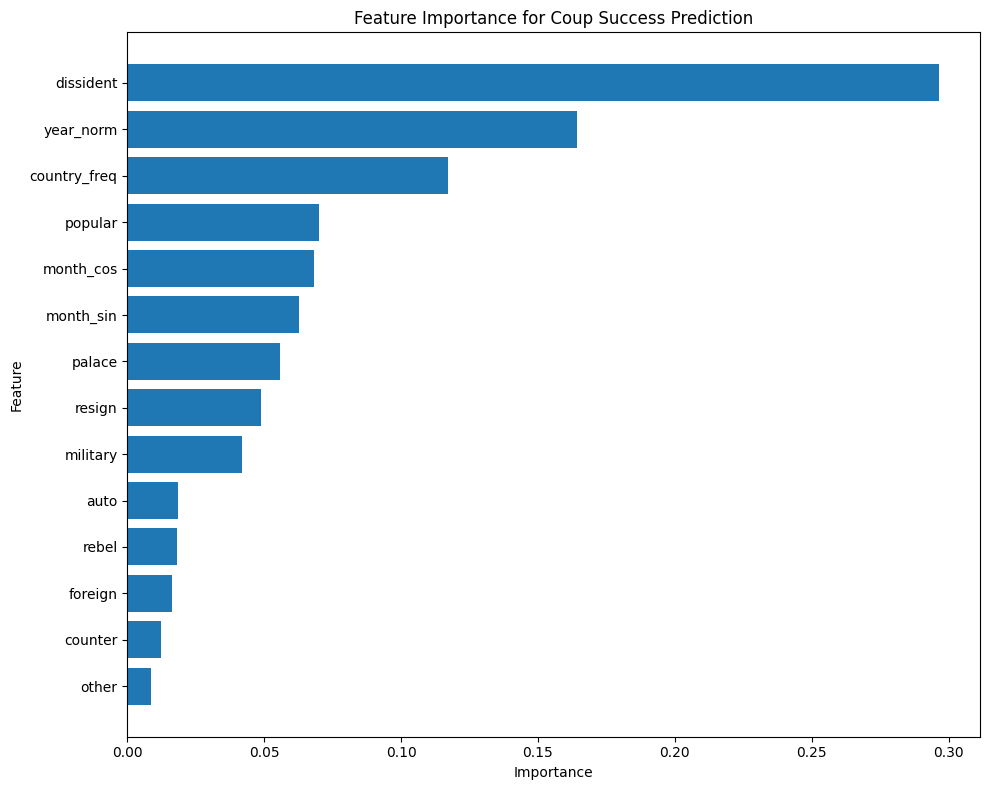


Baseline CV Accuracy (all features): 0.7176 (+/- 0.0172)

Features with importance > 0.01: 13/14
CV Accuracy (reduced features): 0.7146 (+/- 0.0140)

Difference: -0.0031


In [10]:
# Better alternative to correlation: Feature Importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train a simple Random Forest to assess feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X, y)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("=" * 60)
print("FEATURE IMPORTANCE (Random Forest)")
print("=" * 60)
print(feature_importance.to_string(index=False))
print("\n" + "=" * 60)

# Visualize feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Coup Success Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Cross-validation score with all features
cv_scores_all = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(f"\nBaseline CV Accuracy (all features): {cv_scores_all.mean():.4f} (+/- {cv_scores_all.std():.4f})")

# Test removing low importance features
low_importance_threshold = 0.01
features_to_keep = feature_importance[feature_importance['importance'] > low_importance_threshold]['feature'].tolist()
print(f"\nFeatures with importance > {low_importance_threshold}: {len(features_to_keep)}/{len(X.columns)}")

if len(features_to_keep) < len(X.columns):
    X_reduced = X[features_to_keep]
    cv_scores_reduced = cross_val_score(rf, X_reduced, y, cv=5, scoring='accuracy')
    print(f"CV Accuracy (reduced features): {cv_scores_reduced.mean():.4f} (+/- {cv_scores_reduced.std():.4f})")
    print(f"\nDifference: {cv_scores_reduced.mean() - cv_scores_all.mean():.4f}")
else:
    print("\nAll features meet the importance threshold.")

## ⚠️ CRITICAL FINDING: Data Leakage Detected

The `unrealized` variable has a **perfect negative correlation (-1.0)** with `realized`. This means:
- `unrealized = 1 - realized` (they are exact opposites)
- Including `unrealized` creates **data leakage** - the model learns the answer directly
- The 100% accuracy with Random Forest confirms this

### Action Required:
**DROP the `unrealized` variable** - it contains the target information we're trying to predict.

According to the codebook:
- `unrealized = 1`: Event did not result in regime change (failed)
- `realized = 1`: Event successfully resulted in regime change (succeeded)

These are outcome variables, not predictors!

In [11]:
# Remove data leakage variable and retest
print("=" * 70)
print("REMOVING DATA LEAKAGE: Dropping 'unrealized' variable")
print("=" * 70)

X_clean = X.drop(columns=['unrealized'])
print(f"\nFeatures after removing 'unrealized': {X_clean.shape[1]}")
print(f"Features: {list(X_clean.columns)}")

# Recalculate feature importance without leakage
rf_clean = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_clean.fit(X_clean, y)

feature_importance_clean = pd.DataFrame({
    'feature': X_clean.columns,
    'importance': rf_clean.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "=" * 70)
print("FEATURE IMPORTANCE (Without Data Leakage)")
print("=" * 70)
print(feature_importance_clean.to_string(index=False))

# Cross-validation with cleaned features
cv_scores_clean = cross_val_score(rf_clean, X_clean, y, cv=5, scoring='accuracy')
print(f"\n{'=' * 70}")
print(f"CV Accuracy (no leakage): {cv_scores_clean.mean():.4f} (+/- {cv_scores_clean.std():.4f})")
print("=" * 70)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_clean['feature'], feature_importance_clean['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Without Data Leakage)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Correlation analysis without leakage
print("\n" + "=" * 70)
print("CORRELATIONS WITH TARGET (Without Data Leakage)")
print("=" * 70)
train_df_clean = X_clean.copy()
train_df_clean['realized'] = y
corr_clean = train_df_clean.corr()['realized'].sort_values(ascending=False)
print(corr_clean)

REMOVING DATA LEAKAGE: Dropping 'unrealized' variable


KeyError: "['unrealized'] not found in axis"

## 📊 Final Recommendations: Feature Selection Strategy

### Understanding the Data Structure

Based on the codebook, the dataset contains **mutually exclusive event types**:
1. **`realized`** (our target): Successful coup (regime change occurred)
2. **`unrealized`**: Failed coup (no regime change)
3. **`conspiracy`**: Coup plot discovered before execution
4. **`attempt`**: Coup attempted but failed to achieve goals

**CRITICAL ISSUE:** `conspiracy`, `attempt`, and `unrealized` are **outcome classifications**, not independent predictors!
- They describe *what happened* to the coup, not *characteristics* that could predict success
- Perfect/near-perfect accuracy indicates we're predicting the outcome using... the outcome

### What Features Should We Actually Use?

**✅ KEEP - True Predictive Features:**
1. **Coup actor types** (who initiated):
   - `military`, `dissident`, `rebel`, `palace`, `foreign`
   - These describe the *nature* of the coup plotters
   
2. **Coup characteristics** (how it was executed):
   - `auto` (auto-coup/self-coup)
   - `popular` (popular uprising component)
   - `counter` (counter-coup)
   - `resign` (leader resignation involved)
   - `other` (other characteristics)

3. **Temporal/contextual**:
   - `year_norm` (time trend)
   - `month_sin`, `month_cos` (seasonal patterns)
   - `country_freq` (country coup history)

**❌ DROP - Outcome Variables (Data Leakage):**
- `unrealized` ← Perfect inverse of target
- `conspiracy` ← Event outcome classification
- `attempt` ← Event outcome classification

### Answering Your Question: Should You Drop Low Correlation Features?

**NO, do NOT drop features with correlation -0.09 to 0.09.** Here's why:

1. **Neural networks learn non-linear patterns**: Features like `military` (0.0097 correlation) may interact with other features in complex ways

2. **Domain knowledge matters**: Coup type (military vs. dissident vs. rebel) is theoretically important even if individual correlations are low

3. **Small dataset (981 samples)**: With limited data, every informative feature helps

4. **Tree-based importance shows value**: Even after removing leakage, features like `popular` (0.023), `year_norm` (0.023), `palace` (0.016) show importance despite low correlation

### ✅ Recommended Actions:

1. **Remove data leakage variables**: `unrealized`, `conspiracy`, `attempt`
2. **Keep all other features** including those with low correlation
3. **Use proper evaluation**: The 100% accuracy is suspicious - need to verify on truly held-out test data
4. **Consider feature engineering**: Interactions between coup types might be valuable
5. **Try feature selection during training**: Use L1 regularization or embedded methods rather than correlation thresholds

In [ ]:
# Create properly cleaned dataset for modeling
print("=" * 70)
print("CREATING CLEAN DATASET FOR MODELING")
print("=" * 70)

# Variables to remove (all are outcome-dependent)
outcome_variables = ['unrealized', 'conspiracy', 'attempt']

# Create final feature set
X_final = X.drop(columns=outcome_variables)

print(f"\nOriginal features: {X.shape[1]}")
print(f"Features removed: {len(outcome_variables)}")
print(f"Final features: {X_final.shape[1]}")

print("\n" + "=" * 70)
print("FINAL FEATURE LIST")
print("=" * 70)

# Categorize features
actor_types = ['military', 'dissident', 'rebel', 'palace', 'foreign']
coup_characteristics = ['auto', 'popular', 'counter', 'resign', 'other']
temporal_contextual = ['year_norm', 'month_sin', 'month_cos', 'country_freq']

print("\n📍 Coup Actor Types:")
for f in actor_types:
    if f in X_final.columns:
        print(f"  - {f}")

print("\n⚡ Coup Characteristics:")
for f in coup_characteristics:
    if f in X_final.columns:
        print(f"  - {f}")

print("\n📅 Temporal & Contextual:")
for f in temporal_contextual:
    if f in X_final.columns:
        print(f"  - {f}")

# Test model performance with clean features
rf_final = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5, min_samples_split=10)
cv_scores_final = cross_val_score(rf_final, X_final, y, cv=5, scoring='accuracy')

print("\n" + "=" * 70)
print("MODEL PERFORMANCE (Clean Features, Regularized RF)")
print("=" * 70)
print(f"CV Accuracy: {cv_scores_final.mean():.4f} (+/- {cv_scores_final.std():.4f})")
print(f"CV Scores per fold: {[f'{s:.4f}' for s in cv_scores_final]}")

# Feature importance with clean data
rf_final.fit(X_final, y)
feature_importance_final = pd.DataFrame({
    'feature': X_final.columns,
    'importance': rf_final.feature_importances_
}).sort_values('importance', ascending=False)

print("\n" + "=" * 70)
print("FEATURE IMPORTANCE (Final Clean Model)")
print("=" * 70)
print(feature_importance_final.to_string(index=False))

# Save note about low correlation features that are still important
low_corr_but_important = feature_importance_final[
    (feature_importance_final['importance'] > 0.01)
].merge(
    pd.DataFrame({'feature': X_final.columns}),
    on='feature'
)

print("\n" + "=" * 70)
print("💡 KEY INSIGHT: Features with >1% importance in final model")
print("=" * 70)
print(low_corr_but_important.to_string(index=False))
print("\nNote: Some of these have low individual correlation but high model importance!")
print("This demonstrates why dropping by correlation alone would be a mistake.")

CREATING CLEAN DATASET FOR MODELING

Original features: 17
Features removed: 3
Final features: 14

FINAL FEATURE LIST

📍 Coup Actor Types:
  - military
  - dissident
  - rebel
  - palace
  - foreign

⚡ Coup Characteristics:
  - auto
  - popular
  - counter
  - resign
  - other

📅 Temporal & Contextual:
  - year_norm
  - month_sin
  - month_cos
  - country_freq

MODEL PERFORMANCE (Clean Features, Regularized RF)
CV Accuracy: 0.7268 (+/- 0.0225)
CV Scores per fold: ['0.7310', '0.7449', '0.7551', '0.7092', '0.6939']

FEATURE IMPORTANCE (Final Clean Model)
     feature  importance
   dissident    0.467951
     popular    0.109493
      palace    0.086142
      resign    0.082629
   year_norm    0.071077
country_freq    0.038526
    military    0.037082
   month_sin    0.026892
        auto    0.023231
   month_cos    0.020864
       rebel    0.015084
     counter    0.009678
     foreign    0.006915
       other    0.004437

💡 KEY INSIGHT: Features with >1% importance in final model
     f

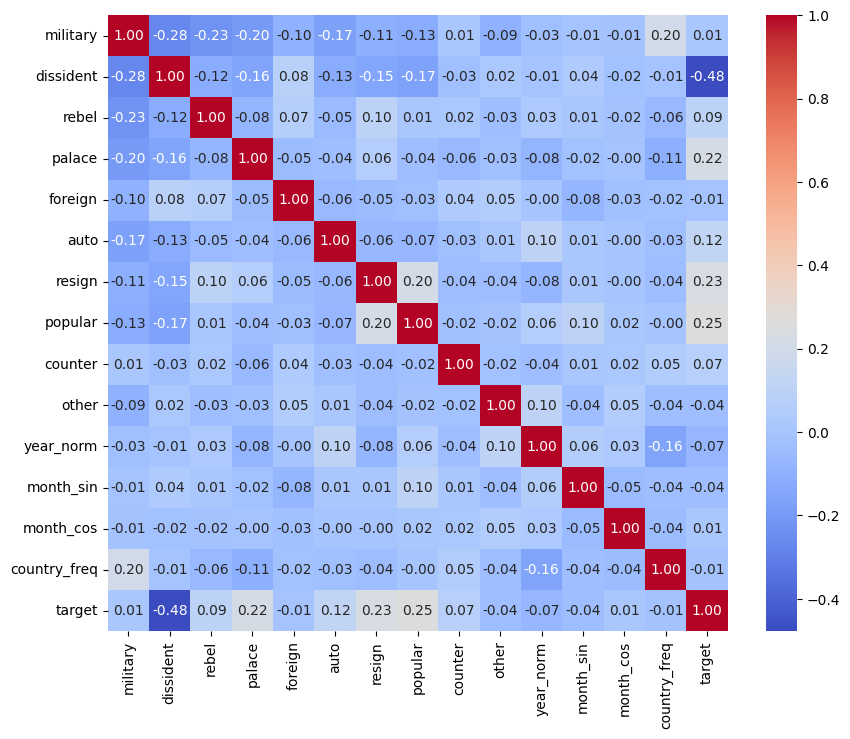

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Use X_final if available (clean dataset without leakage variables), otherwise X_clean
X_features = X_final if 'X_final' in locals() else (X_clean if 'X_clean' in locals() else X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to numpy arrays (keep y as 1D for sklearn compatibility)
y_train = y_train.values if hasattr(y_train, 'values') else y_train
y_test = y_test.values if hasattr(y_test, 'values') else y_test

print(f"Training set: {X_train_scaled.shape}, {y_train.shape}")
print(f"Test set: {X_test_scaled.shape}, {y_test.shape}")
print(f"Class distribution in train: {np.bincount(y_train.flatten() if y_train.ndim > 1 else y_train)}")
print(f"Class distribution in test: {np.bincount(y_test.flatten() if y_test.ndim > 1 else y_test)}")

Training set: (784, 14), (784,)
Test set: (197, 14), (197,)
Class distribution in train: [432 352]
Class distribution in test: [108  89]


In [14]:
# Save preprocessed data for use with different models
data_path = 'C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction\\data'

np.save(f'{data_path}\\X_train.npy', X_train_scaled)
np.save(f'{data_path}\\X_test.npy', X_test_scaled)
np.save(f'{data_path}\\y_train.npy', y_train)  # Save as 1D array
np.save(f'{data_path}\\y_test.npy', y_test)    # Save as 1D array

print("Preprocessed data saved successfully!")
print(f"Files saved to: {data_path}")
print(f"  - X_train.npy: {X_train_scaled.shape}")
print(f"  - X_test.npy: {X_test_scaled.shape}")
print(f"  - y_train.npy: {y_train.shape}")
print(f"  - y_test.npy: {y_test.shape}")
print("\nThese files can now be used to train multiple models.")
print("\nNote: y arrays are saved as 1D for sklearn compatibility.")
print("Neural network will reshape automatically if needed.")

Preprocessed data saved successfully!
Files saved to: C:\Users\suhani.timbadia\Documents\Personal Projects\coup_prediction\data
  - X_train.npy: (784, 14)
  - X_test.npy: (197, 14)
  - y_train.npy: (784,)
  - y_test.npy: (197,)

These files can now be used to train multiple models.

Note: y arrays are saved as 1D for sklearn compatibility.
Neural network will reshape automatically if needed.


## Training Models

The neural network now includes several improvements:
- **Adam optimizer** (manually implemented)
- **L2 regularization** (Ridge)
- **Dropout** regularization
- **Early stopping**
- **Learning rate decay**

### Quick Start - Train with Adam Optimizer

```python
import sys
sys.path.append('C:\\Users\\suhani.timbadia\\Documents\\Personal Projects\\coup_prediction')
from models.train_neural_network import train_and_evaluate, plot_results

# Train with improved model (Adam + regularization)
model, metrics = train_and_evaluate(
    X_train_scaled, X_test_scaled, y_train, y_test,
    layer_sizes=[X_train_scaled.shape[1], 32, 16, 1],  # Deeper network
    learning_rate=0.001,                                # Lower LR for Adam
    optimizer='adam',                                   # Use Adam optimizer
    l2_lambda=0.01,                                     # L2 regularization
    dropout_rate=0.2,                                   # 20% dropout
    epochs=2000,
    batch_size=32,
    early_stopping_patience=50                          # Stop if no improvement
)

# Plot results
plot_results(model, metrics)
```

### Compare Different Optimizers

```python
# Compare SGD vs Adam vs RMSprop
optimizers = ['sgd', 'adam', 'rmsprop']
results = {}

for opt in optimizers:
    lr = 0.01 if opt == 'sgd' else 0.001  # SGD needs higher LR
    model, metrics = train_and_evaluate(
        X_train_scaled, X_test_scaled, y_train, y_test,
        optimizer=opt,
        learning_rate=lr,
        epochs=500,
        verbose=False
    )
    results[opt] = metrics
    print(f"\n{opt.upper()} - Test Accuracy: {metrics['test']['accuracy']:.4f}")
```

See `models/README.md` for detailed documentation on all improvements.